# WorldQuant University
## MscFE690 Capstone Project
### Student Group 7119

Abhijeet Aanand

Amparo Garcia Garcia

In [ ]:
!pip install riskfolio-lib

In [4]:
import pandas as pd
import yfinance as yf
import numpy as np
import plotly.express as px
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [11]:
# List of some of the most important world stock indexes
stock_indexes = pd.read_html('https://finance.yahoo.com/world-indices')[0]
print('Shape of dataframe of stock indexes: ', stock_indexes.shape)
#Most traded stocks worldwide
stock_indexes.sort_values(by="Volume", ascending=False).head()

HTTPError: HTTP Error 404: Not Found

In [12]:
#Most expensive indexes
stock_indexes.sort_values(by="Last Price", ascending=False).head()

NameError: name 'stock_indexes' is not defined

In [13]:
#Define some indexes from each continent
continents=['Africa', 'America', 'Asia', 'Europe', 'Oceania']
tickers_af=['^ZADOW', '^NQMAEURN'] #Dow Jones South Africa, Nasdaq Morocco EUR NTR
tickers_am=['^BVSP', '^DJI', '^IXIC', '^GSPC', '^MXX'] #Bovespa (Brasil), Dow Jones (USA), Nasdaq (USA), IPC Mexico
tickers_as=['^HSI', '^NSEI', '^N225'] #Hang Seng Index (China), Nifty 50 (India), Nikkei 255 (Japan)
tickers_eu=['^FCHI', '^GDAXI', '^IBEX', '^STOXX50E', '^FTSE'] #CAC 40 (France), DAX 30 (Germany), IBEX 35 (Spain), EuroStoxx 50 (Whole Euro Zone), FTSE 100 (UK)
tickers_oc=['^AXJO'] #S&P/ASX 200 (Australia)
start_date='2022-01-01'
end_date='2023-12-31'

In [16]:
def extract_data(tickers, start_date, end_date):
  df_all=pd.DataFrame()
  df_returns_all=pd.DataFrame()
  lista_df=[]
  for ticker in tickers:
    df=yf.download(ticker, start=start_date, end=end_date)
    df=df[['Adj Close', 'Volume']]
    lista_df.append(df)
    df_all[f'{ticker}']=df['Adj Close']
    df_returns_all[f'{ticker}']=np.log(df["Adj Close"] / df["Adj Close"].shift(1))

  return [lista_df, df_all, df_returns_all]

In [17]:
df_africa, df_af, df_ret_af=extract_data(tickers_af, start_date, end_date)
df_america, df_am, df_ret_am=extract_data(tickers_am, start_date, end_date)
df_asia, df_as, df_ret_as=extract_data(tickers_as, start_date, end_date)
df_europe, df_eu, df_ret_eu=extract_data(tickers_eu, start_date, end_date)
df_oceania, df_oc, df_ret_oc=extract_data(tickers_oc, start_date, end_date)
df_continents=[df_af, df_am, df_as, df_eu, df_oc]
df_returns_continents=[df_ret_af, df_ret_am, df_ret_as, df_ret_eu, df_ret_oc]

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^ZADOW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2022-01-01 -> 2023-12-31)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^NQMAEURN']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2022-01-01 -> 2023-12-31)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%****************

In [18]:
for i in range(len(continents)):
  #print(f'Statistics for {continents[i]}')
  #display(df_continents[i].describe())
  display(px.line(df_continents[i], title=f'Stock Indexes from {continents[i]}'))

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [20]:
df_all_continents=pd.concat([df_af, df_am, df_as, df_eu, df_oc])
df_all_continents.head()

<ipython-input-20-c21aa8c52742>:1: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



,^ZADOW,^NQMAEURN,^BVSP,^DJI,^IXIC,^GSPC,^MXX,^HSI,^NSEI,^N225,^FCHI,^GDAXI,^IBEX,^STOXX50E,^FTSE,^AXJO
2022-01-03,NaN,NaN,103922.0,36585.058594,15832.799805,4796.560059,52941.011719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,NaN,NaN,103514.0,36799.648438,15622.719727,4793.540039,53016.781250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,NaN,NaN,101006.0,36407.109375,15100.169922,4700.580078,53024.148438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,NaN,NaN,101561.0,36236.468750,15080.860352,4696.049805,53055.308594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07,NaN,NaN,102719.0,36231.660156,14935.900391,4677.029785,53202.109375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
px.line(df_all_continents, title=f'World Stock Indexes')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



As it is shown in the graphs above, BOVESPA and NSEI are chosen because they are from BRICS countries so it will be interesting to analyze them regarding for example GDAXI (Germany) and IBEX (Spain). From USA Dow Jones (DJI) will be our choice, from China HSI and from the European Union we will choose STOXX50E.

From Africa and Australia none are chosen as there are not so many data available of them.

# GDAXI Index (Germany)

In [53]:
gdaxi_stocks=['BAYN.DE' , 'VNA.DE' , 'ENR.DE' , 'SHL.DE' , 'RWE.DE' , 'SY1.DE' , '1COV.DE' , 'ADS.DE' , 'MRK.DE' , 'MTX.DE' , 'EOAN.DE' , 'BEI.DE' , 'DTE.DE' , 'HEI.DE' , 'ALV.DE' , 'P911.DE' , 'DB1.DE' , 'DHL.DE' , 'ZAL.DE' , 'FRE.DE' , 'DBK.DE' , 'HNR1.DE' , 'DTG.DE' , 'SIE.DE' , 'AIR.DE' , 'BMW.DE' , 'BAS.DE' , 'VOW3.DE' , 'CON.DE' , 'IFX.DE']

def get_correlations(market_index, continent, stocks, start_date, end_date):
  df1, df2, df3=extract_data(gdaxi_stocks, start_date, end_date);
  df2.fillna(0,inplace=True)
  if continent=='EU':
    df2.loc[:,f'{market_index}']=df_eu[f'^{market_index}']
  elif continent=='AM':
    df2.loc[:,f'{market_index}']=df_am[f'^{market_index}']
  elif continent=='AF':
    df2.loc[:,f'{market_index}']=df_af[f'^{market_index}']
  elif continent=='AS':
    df2.loc[:,f'{market_index}']=df_as[f'^{market_index}']
  elif continent=='OC':
    df2.loc[:,f'{market_index}']=df_oc[f'^{market_index}']
  else:
    print('Not a valid conitnent')
  display(px.line(df2.drop(f'{market_index}', axis=1), title=f'{market_index} market index components'))
  display(px.line(df2[f'{market_index}'], title=f'{market_index} market index'))
  display(px.imshow(round(df2.corr(),3), text_auto=True, aspect="auto", title='Correlation of Adjusted Prices'))
  #Now we will do the same with the returns
  df4 = df2.pct_change()
  df4 = df4[1:]
  display(px.imshow(round(df4.corr(),3), text_auto=True, aspect="auto", title='Correlation of Returns'))
  return [df2, df4]

In [23]:
df_gdaxi, df_gdaxi_returns= get_correlations('GDAXI', 'EU', gdaxi_stocks, start_date, end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## 1st Method: Riskfolio-Lib

First, we tried an already programmed portfolio as the easiest and fastest way.

In [26]:
import riskfolio as rp
import warnings
warnings.filterwarnings("ignore")
df_gdaxi_returns.dropna(inplace=True)
returns = df_gdaxi_returns.pct_change().dropna()
index_returns = df_gdaxi_returns[["GDAXI"]]
#returns_gdaxi=df_gdaxi_returns.drop('GDAXI', axis=1)
bench_returns = returns.pop("GDAXI").to_frame()

In [67]:
def get_data_rp(stocks, index, start_date, end_date):
  stocks_dax=stocks
  stocks_dax.append(index)
  data = yf.download(stocks_dax, start=start_date, end=end_date)
  data = data.loc[:, ("Adj Close", slice(None))]
  data.columns = stocks_dax
  returns = data.pct_change().dropna()
  bench_returns = returns.pop(index).to_frame()
  port = rp.Portfolio(returns=returns)
  port.assets_stats(method_mu="hist", method_cov="hist")
  port.kindbench = False
  port.benchindex = bench_returns
  port.allowTE = True
  port.TE = 0.008
  w = port.optimization(model="Classic", rm="CVaR", obj="Sharpe", rf=0, l=0, hist=True)
  frontier = port.efficient_frontier(model="Classic", rm="CVaR",points=100,rf=0,hist=True)

  return [w, frontier, port]

In [68]:
gdaxi_stocks=['BAYN.DE' , 'VNA.DE' , 'ENR.DE' , 'SHL.DE' , 'RWE.DE' , 'SY1.DE' , '1COV.DE' , 'ADS.DE' , 'MRK.DE' , 'MTX.DE' , 'EOAN.DE' , 'BEI.DE' , 'DTE.DE' , 'HEI.DE' , 'ALV.DE' , 'P911.DE' , 'DB1.DE' , 'DHL.DE' , 'ZAL.DE' , 'FRE.DE' , 'DBK.DE' , 'HNR1.DE' , 'DTG.DE' , 'SIE.DE' , 'AIR.DE' , 'BMW.DE' , 'BAS.DE' , 'VOW3.DE' , 'CON.DE' , 'IFX.DE']
w, frontier, port=get_data_rp(gdaxi_stocks, '^GDAXI', "2019-01-01", "2023-12-31")

[*********************100%***********************]  31 of 31 completed


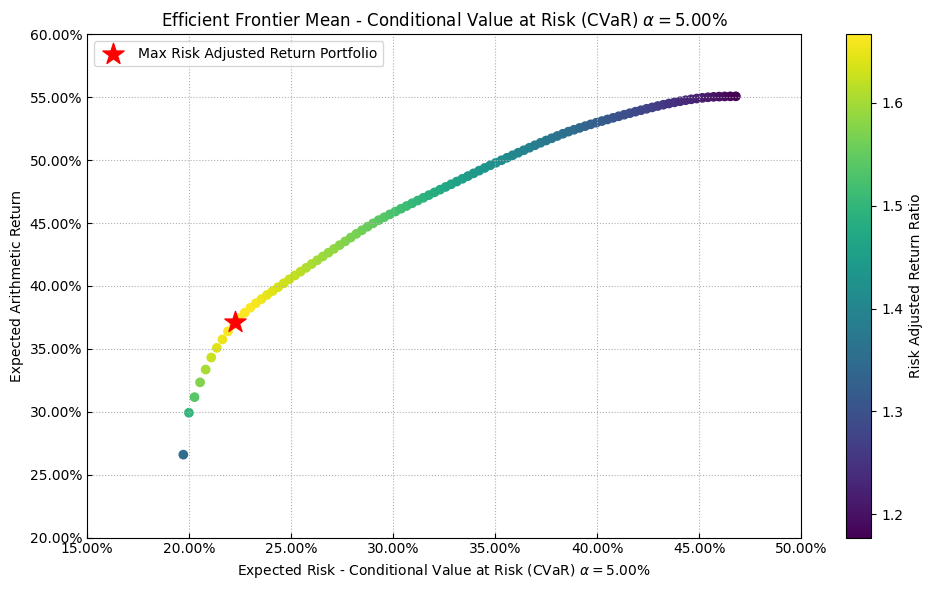

In [69]:
g1 = rp.plot_frontier(w_frontier=frontier,mu=port.mu,cov=port.cov,returns=port.returns,rm="CVaR",rf=0,cmap="viridis",w=w,label="Max Risk Adjusted Return Portfolio",marker="*")


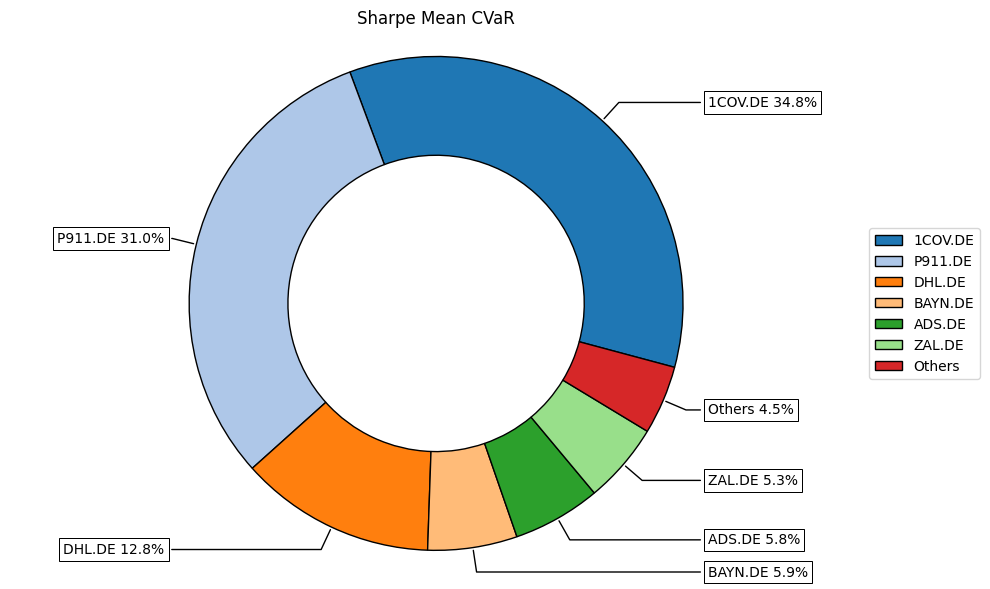

In [70]:
g2=rp.plot_pie(w=w,title="Sharpe Mean CVaR",others=0.05,nrow=25,cmap="tab20",height=6,width=10);


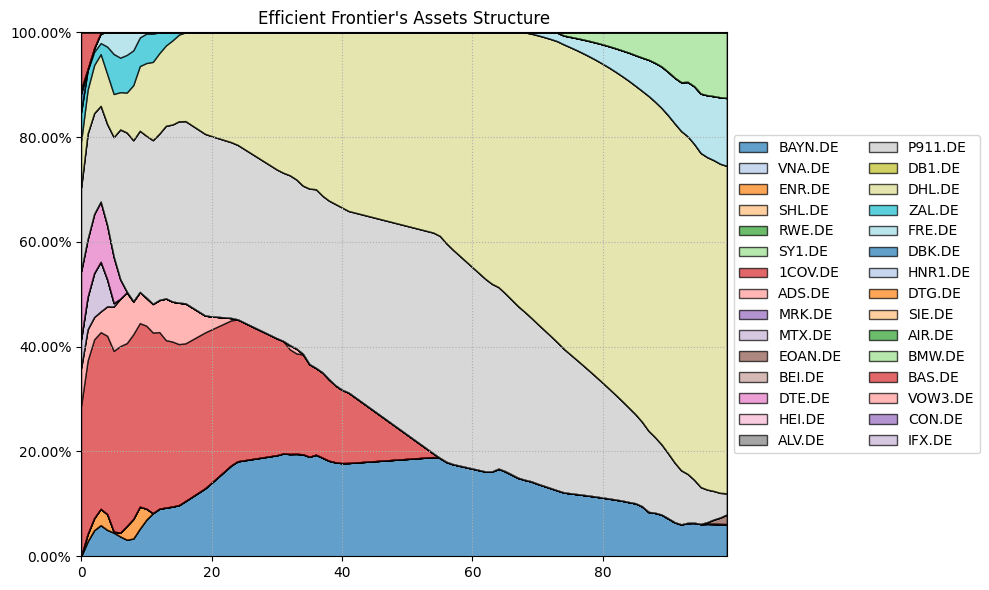

In [71]:
g3 = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 2nd Method: Give weights with Principal Component Analysis

In [84]:
#We will use returns
px.box(df_gdaxi_returns)


In [110]:
pca = PCA(random_state=42)
df_gdaxi_returns.iloc[:, :-1].replace([np.inf, -np.inf], np.nan, inplace=True)
df_gdaxi_returns.iloc[:, :-1].fillna(0, inplace=True)
pca.fit(df_gdaxi_returns.iloc[:, :-1])
variance=pca.explained_variance_ratio_
pesos = pca.components_.T @ variance #Let's calculate pesos with matrix multiplication of the components times the explained variance.
pesos

array([-0.00566197,  0.06248737,  0.02063073,  0.01519884, -0.00511235,
        0.02035032,  0.05120031,  0.05794832,  0.0080738 ,  0.00142438,
        0.00863032,  0.00237142, -0.00513393,  0.0119612 ,  0.01420488,
        0.01343522, -0.00502044, -0.55967594,  0.07740327,  0.01845495,
        0.00766677,  0.00989273,  0.00912529,  0.01043076, -0.00088015,
        0.0062512 ,  0.01996176,  0.02144374,  0.02641479,  0.02075028])

In [111]:
len(pesos)

30

In [116]:
df_gdaxi_returns_replicated=df_gdaxi_returns.copy()
for i in range(len(pesos)):
  df_gdaxi_returns_replicated.iloc[:, i]=df_gdaxi_returns_replicated.iloc[:, i]*pesos[i]
df_gdaxi_returns_replicated['GDAXI_REP']=df_gdaxi_returns_replicated.iloc[:,:-1].sum(axis=1)
df_gdaxi_returns_replicated=df_gdaxi_returns_replicated[['GDAXI_REP', 'GDAXI']]
df_gdaxi_returns_replicated.head()

,GDAXI_REP,GDAXI
Date,,
2022-09-30,-0.001449,0.011591
2022-10-03,-0.002678,0.007852
2022-10-04,0.002495,0.037758
2022-10-05,-0.000681,-0.012099
2022-10-06,0.000421,-0.003707


In [117]:
px.line(df_gdaxi_returns_replicated)

# IBEX 35 (SPAIN)

In [74]:
ibex_stocks=['FER.MC' , 'AENA.MC' , 'IBE.MC' , 'MRL.MC' , 'IAG.MC' , 'NTGY.MC' , 'CLNX.MC' , 'TEF.MC' , 'ITX.MC' , 'ELE.MC' , 'LOG.MC' , 'RED.MC' , 'MTS.MC' , 'FDR.MC' , 'CABK.MC' , 'ANE.MC' , 'BKT.MC' , 'ANA.MC' , 'ENG.MC' , 'AMS.MC' , 'SAB.MC' , 'MAP.MC' , 'BBVA.MC' , 'COL.MC' , 'SAN.MC' , 'ACS.MC' , 'GRF.MC' , 'ACX.MC' , 'UNI.MC' ] #, 'PUIG.MC' was included in 2024
df_ibex, df_ibex_returns= get_correlations('IBEX', 'EU', ibex_stocks, start_date, end_date)
w, frontier, port=get_data_rp(ibex_stocks, '^IBEX', "2021-01-01", "2023-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  30 of 30 completed


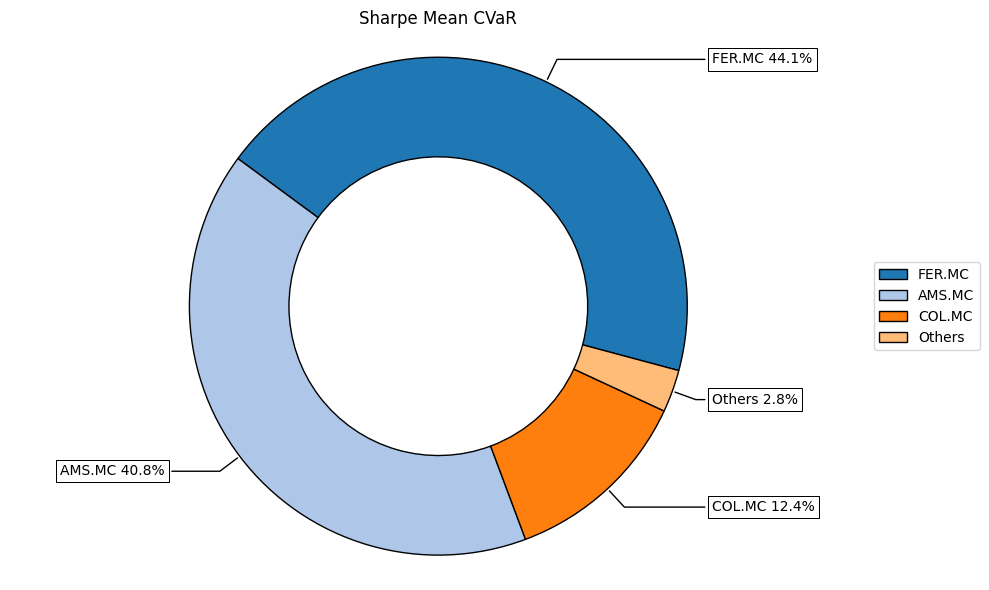

In [75]:
g2=rp.plot_pie(w=w,title="Sharpe Mean CVaR",others=0.05,nrow=25,cmap="tab20",height=6,width=10);


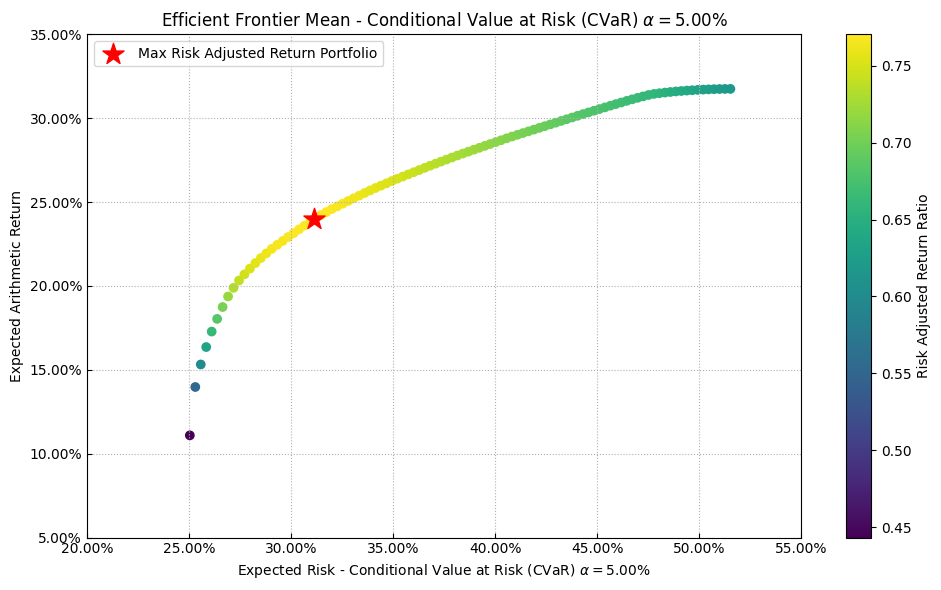

In [76]:
g1 = rp.plot_frontier(w_frontier=frontier,mu=port.mu,cov=port.cov,returns=port.returns,rm="CVaR",rf=0,cmap="viridis",w=w,label="Max Risk Adjusted Return Portfolio",marker="*")


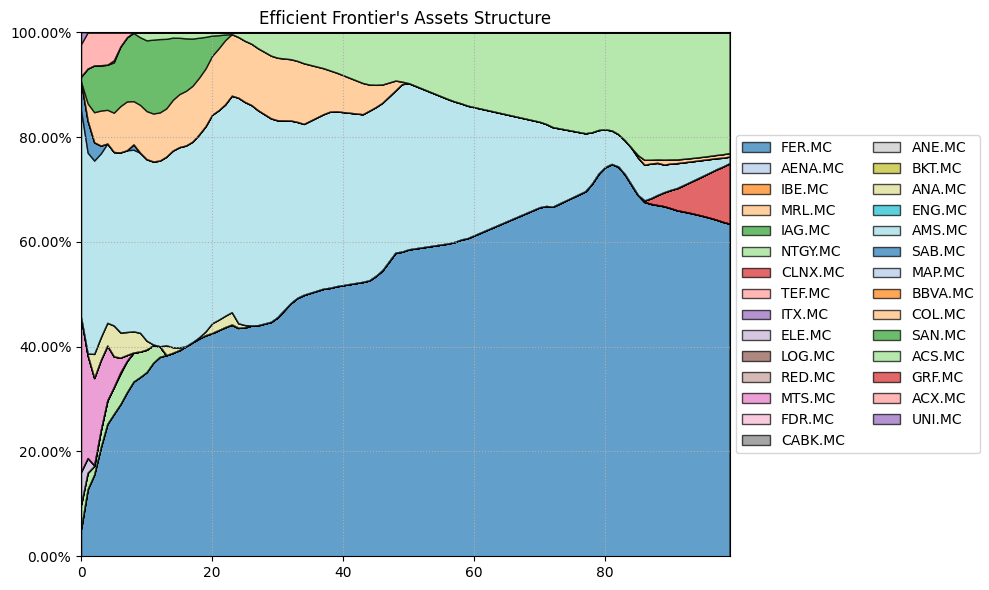

In [77]:
g3 = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

# BVSP Bovespa Index (Brasil)

In [ ]:
bovespa_stocks=['EMBR3.SA' , 'CTIP3.SA' , 'ENBR3.SA' , 'CESP6.SA' , 'CIEL3.SA' , 'BRPR3.SA' , 'ABEV3.SA' , 'CPFE3.SA' , 'CMIG4.SA' , 'CSNA3.SA' , 'BBSE3.SA' , 'EQTL3.SA' , 'CYRE3.SA' , 'BRFS3.SA' , 'CPLE6.SA' , 'CCRO3.SA' , 'BBDC3.SA' , 'BRAP4.SA' , 'ELET3.SA' , 'BBAS3.SA' , 'BBDC4.SA' , 'CSAN3.SA' , 'ESTC3.SA' , 'ECOR3.SA' , 'BVMF3.SA' , '656690' , 'BRML3.SA' , 'GGBR4.SA' , 'BRKM5.SA' , 'FIBR3.SA' ]
df_bovespa, df_bov, df_ret_bov=extract_data(bovespa_stocks, start_date, end_date)
df_bov.head()